In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import auc

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "legend.fontsize": 10,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "figure.dpi": 300,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "grid.linestyle": "--",
})

colors = [
    "#0072B2", "#E69F00", "#009E73", "#D55E00",
    "#CC79A7", "#56B4E9", "#F0E442", "#000000"
]

In [2]:
roc_data = {}   # i stored the data as: {model_name: (fpr, tpr, auroc)}

for file in Path(".").glob("*fpr_tpr_thresholds.npz"):
    npz = np.load(file)
    fpr = npz["arr_0"]
    tpr = npz["arr_1"]
    auroc = auc(fpr, tpr)

    model_name = file.stem.replace("_fpr_tpr_thresholds", "")
    roc_data[model_name] = (fpr, tpr, auroc)

groups = {}

for name, data in roc_data.items():
    prefix = name.split("_")[0]   
    groups.setdefault(prefix, [])
    groups[prefix].append((name, *data))  

Saved: roc_catboost.svg
Saved: roc_lr.svg
Saved: roc_tabnet.svg
Saved: roc_xgboost.svg
Saved: roc_best_models.svg


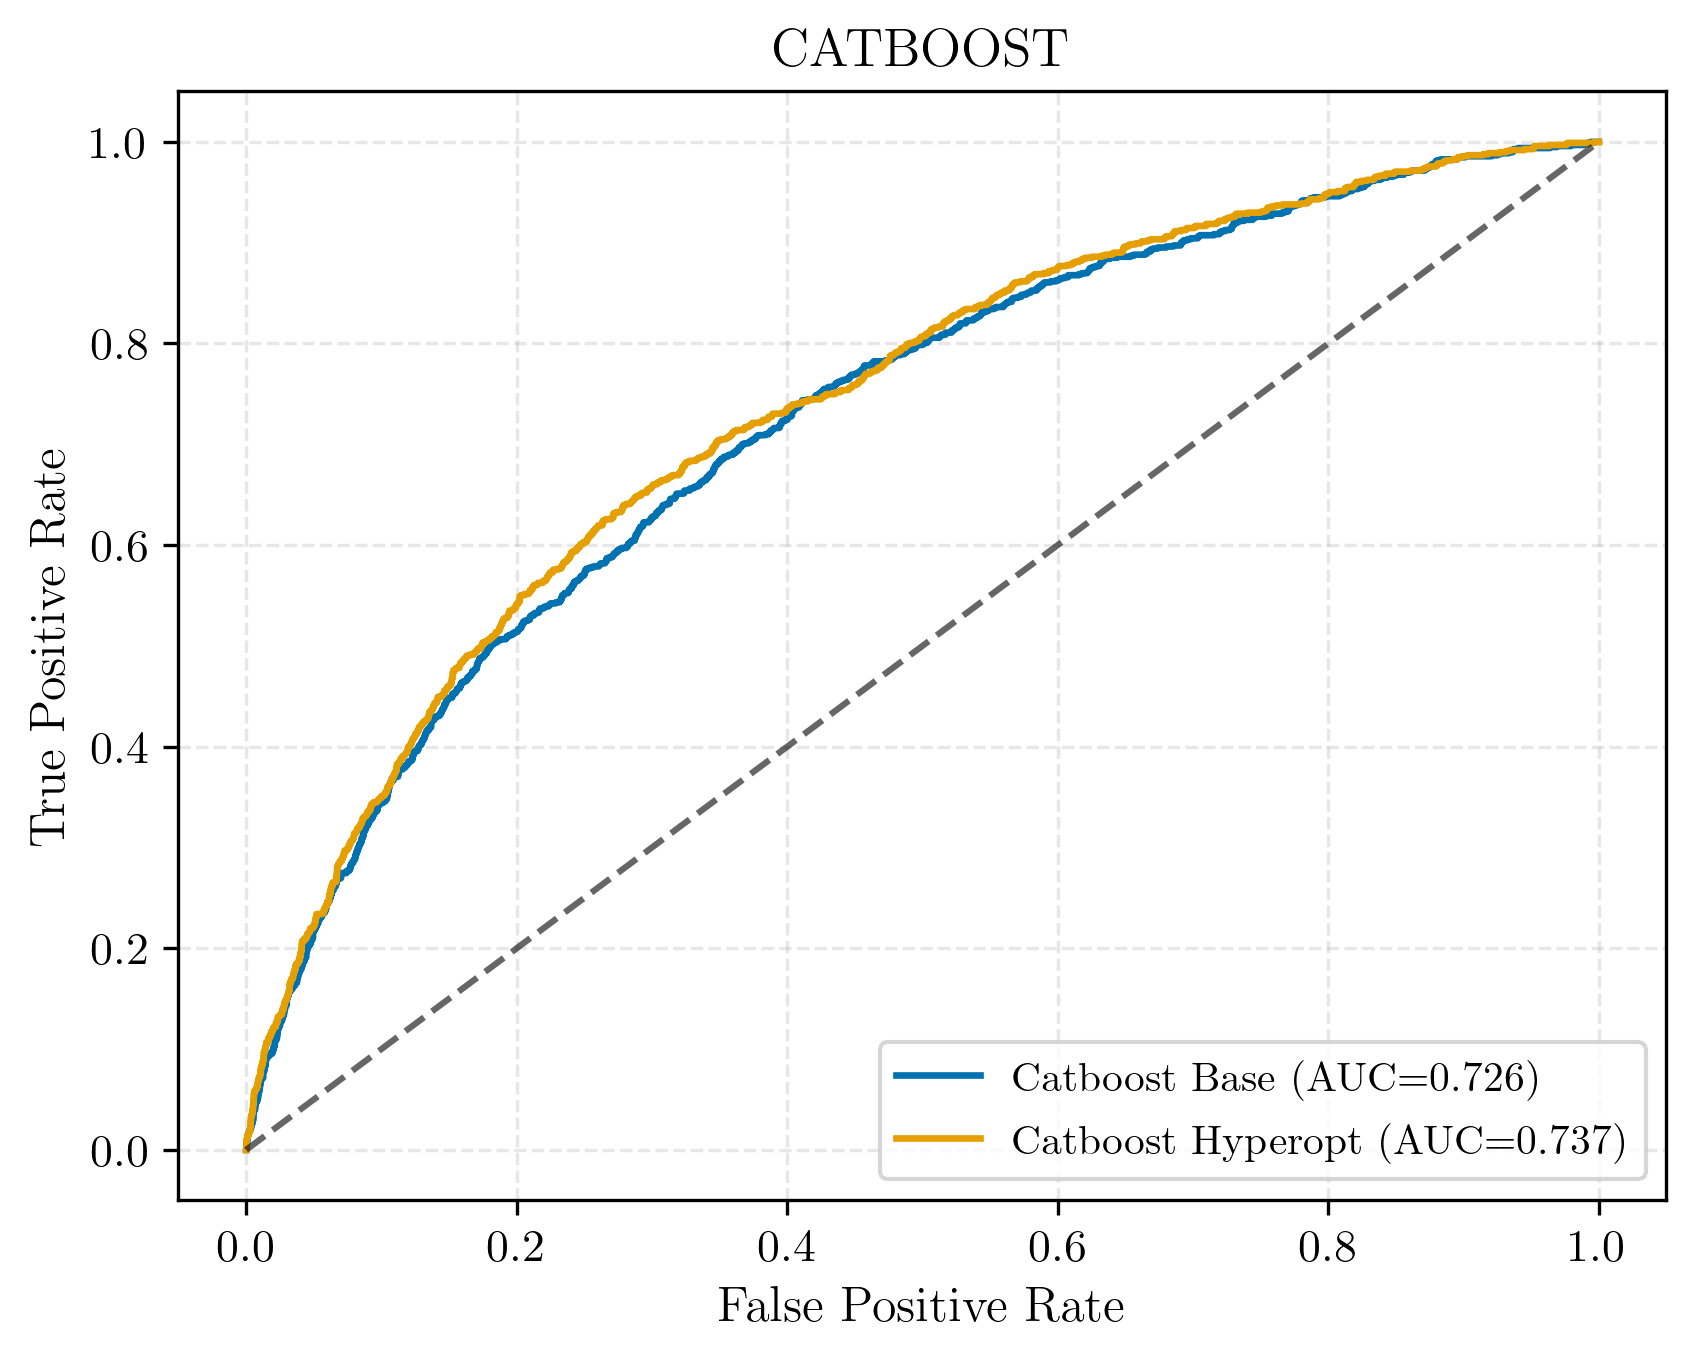

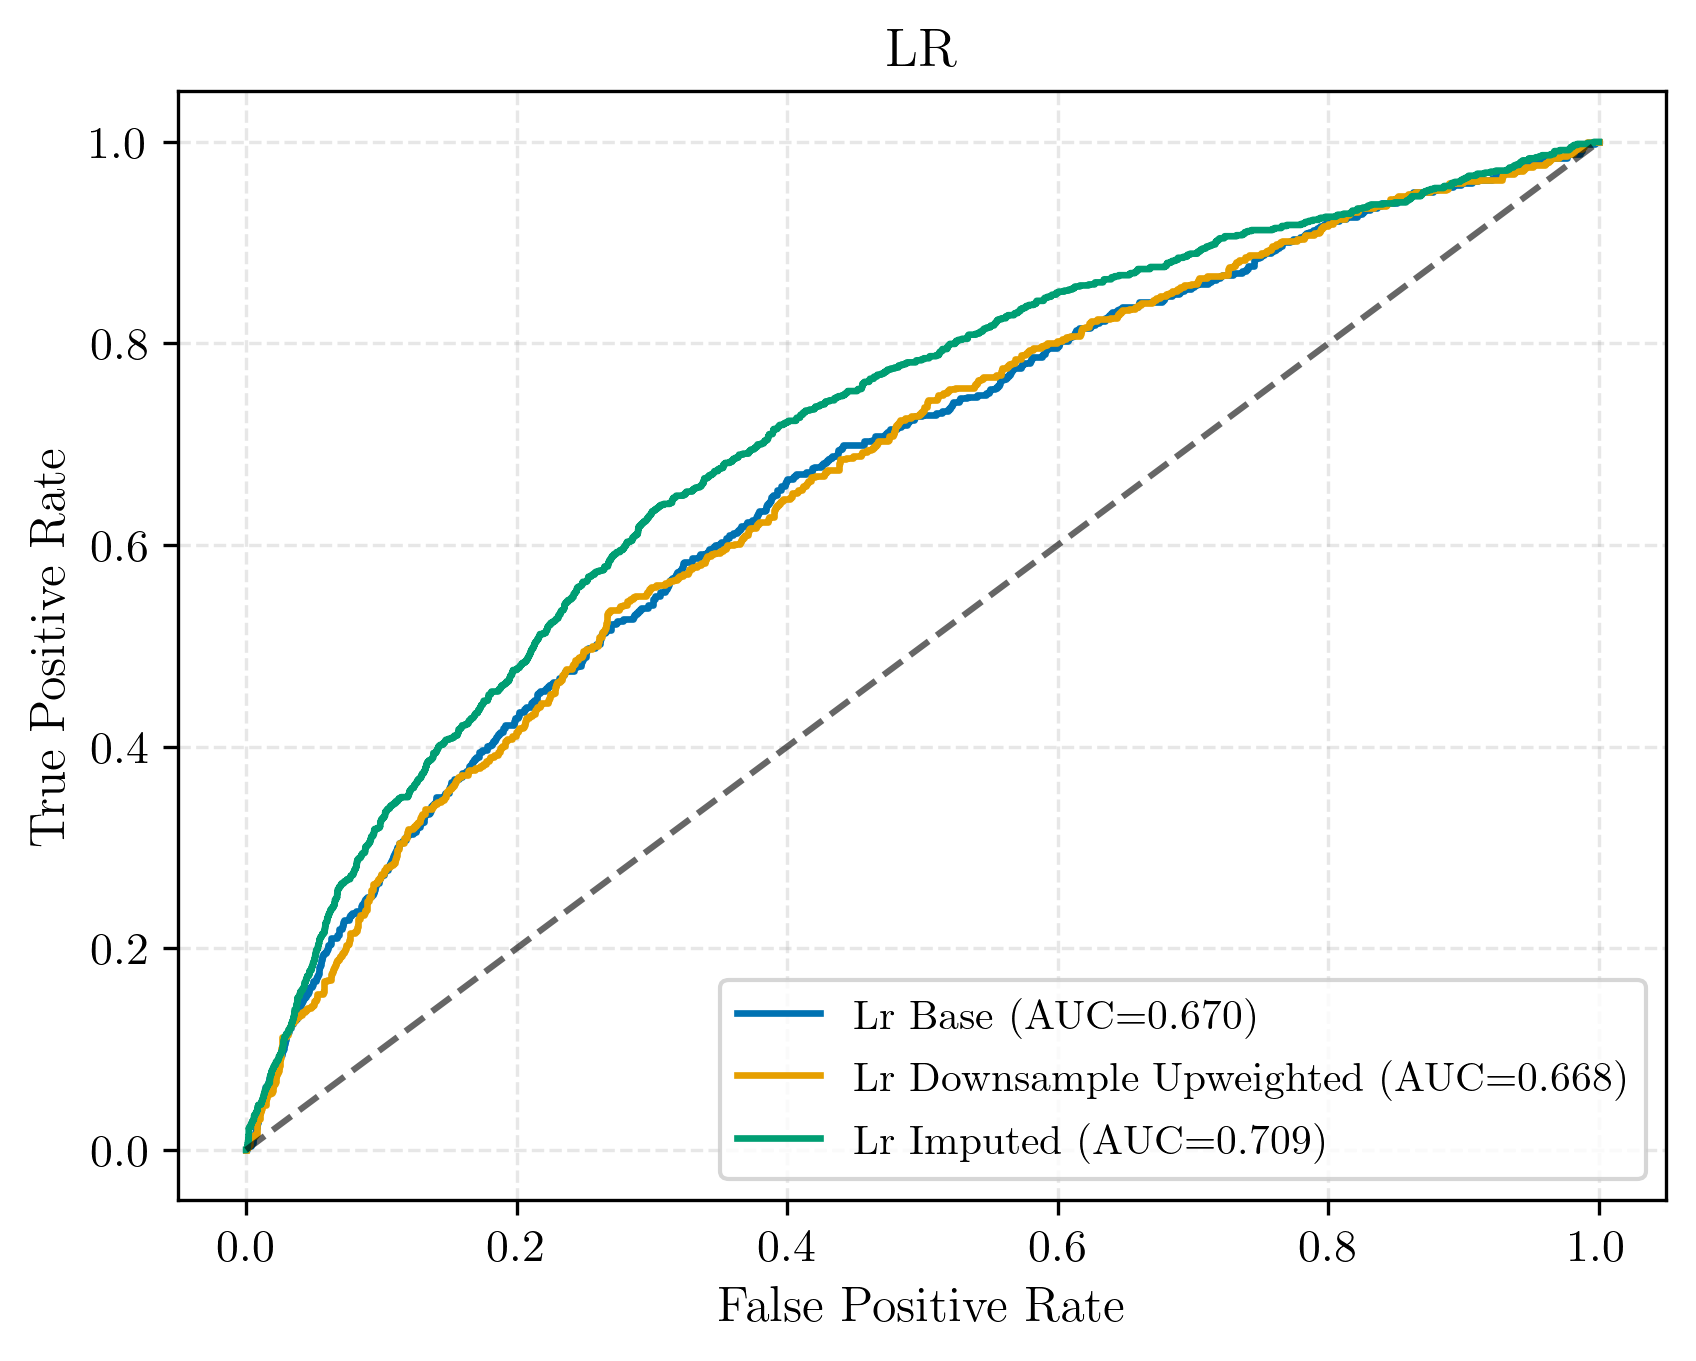

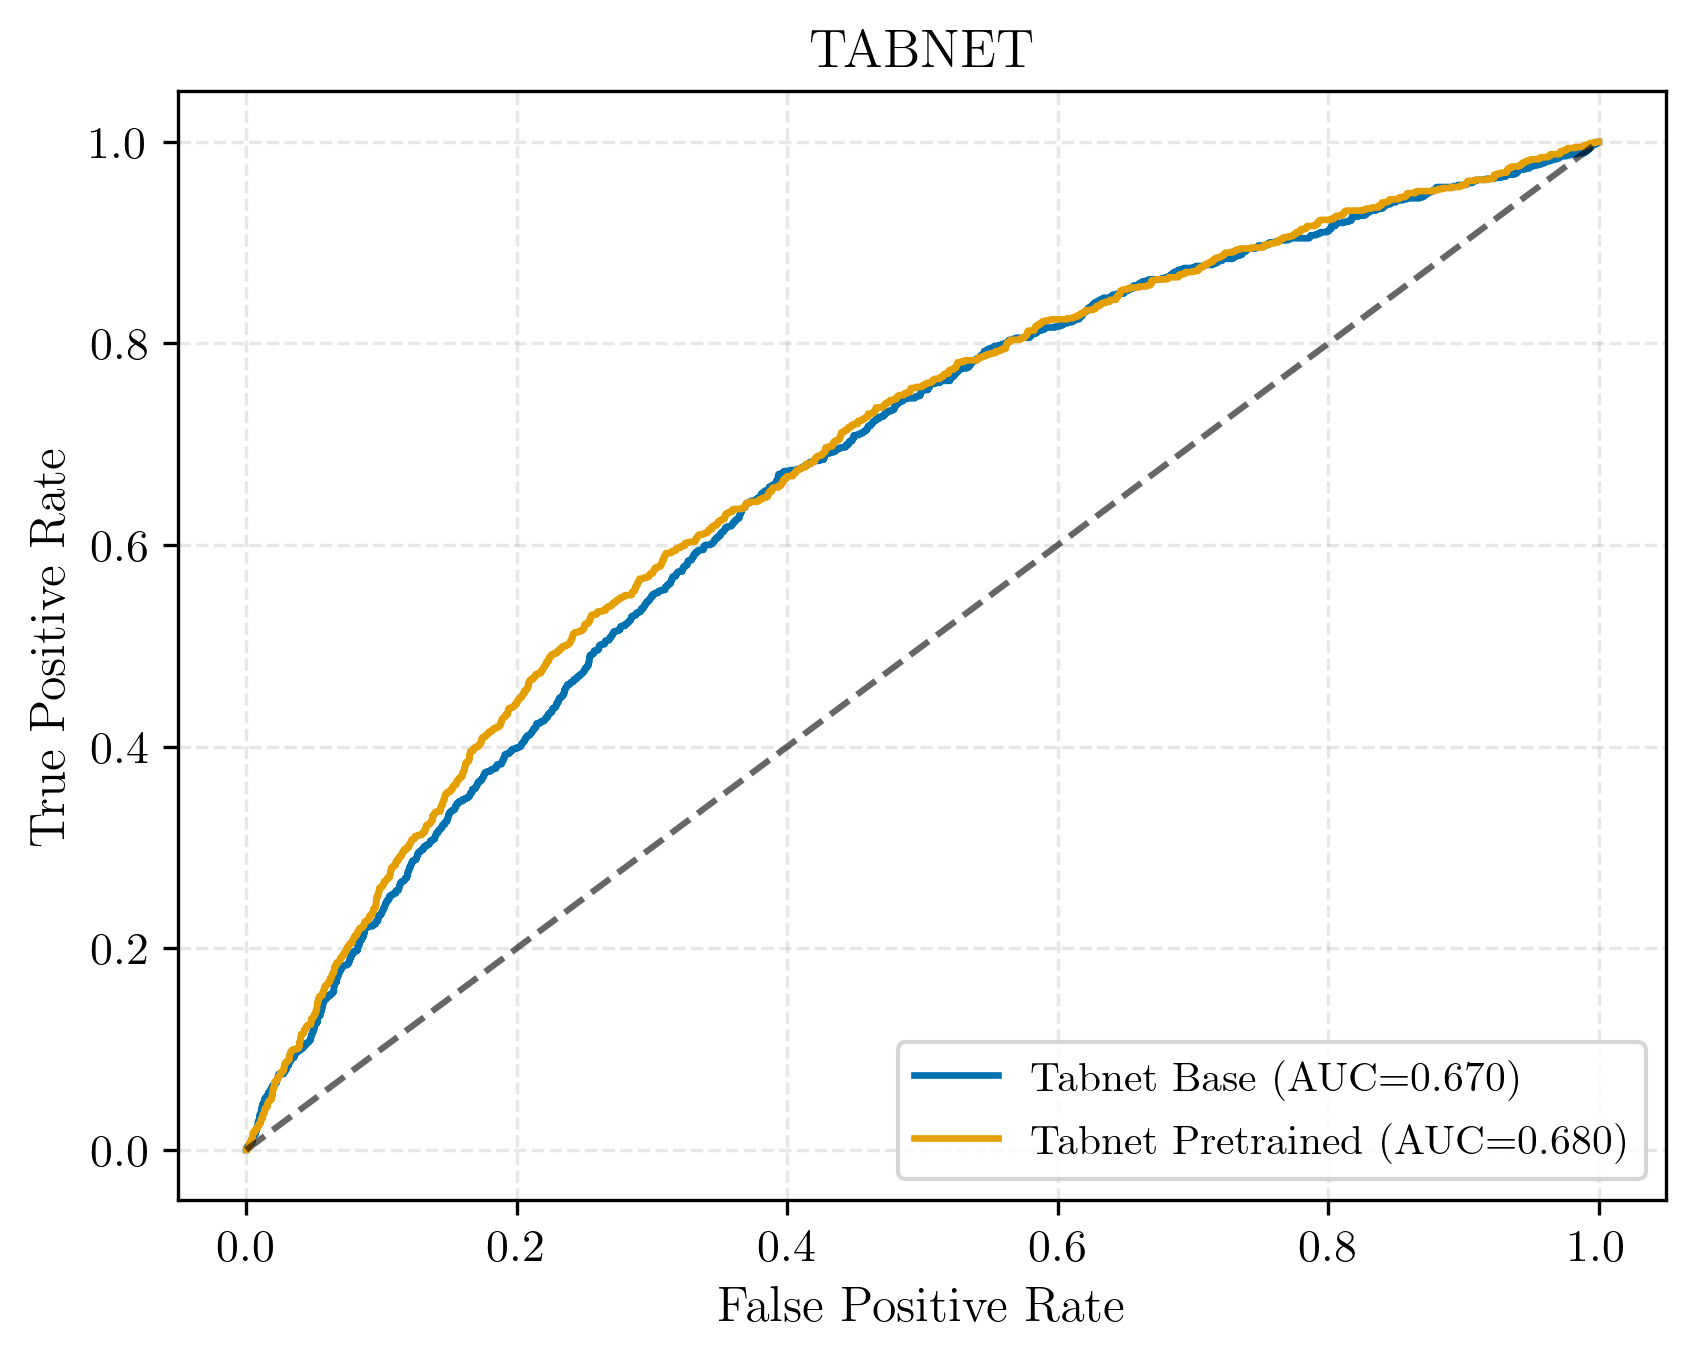

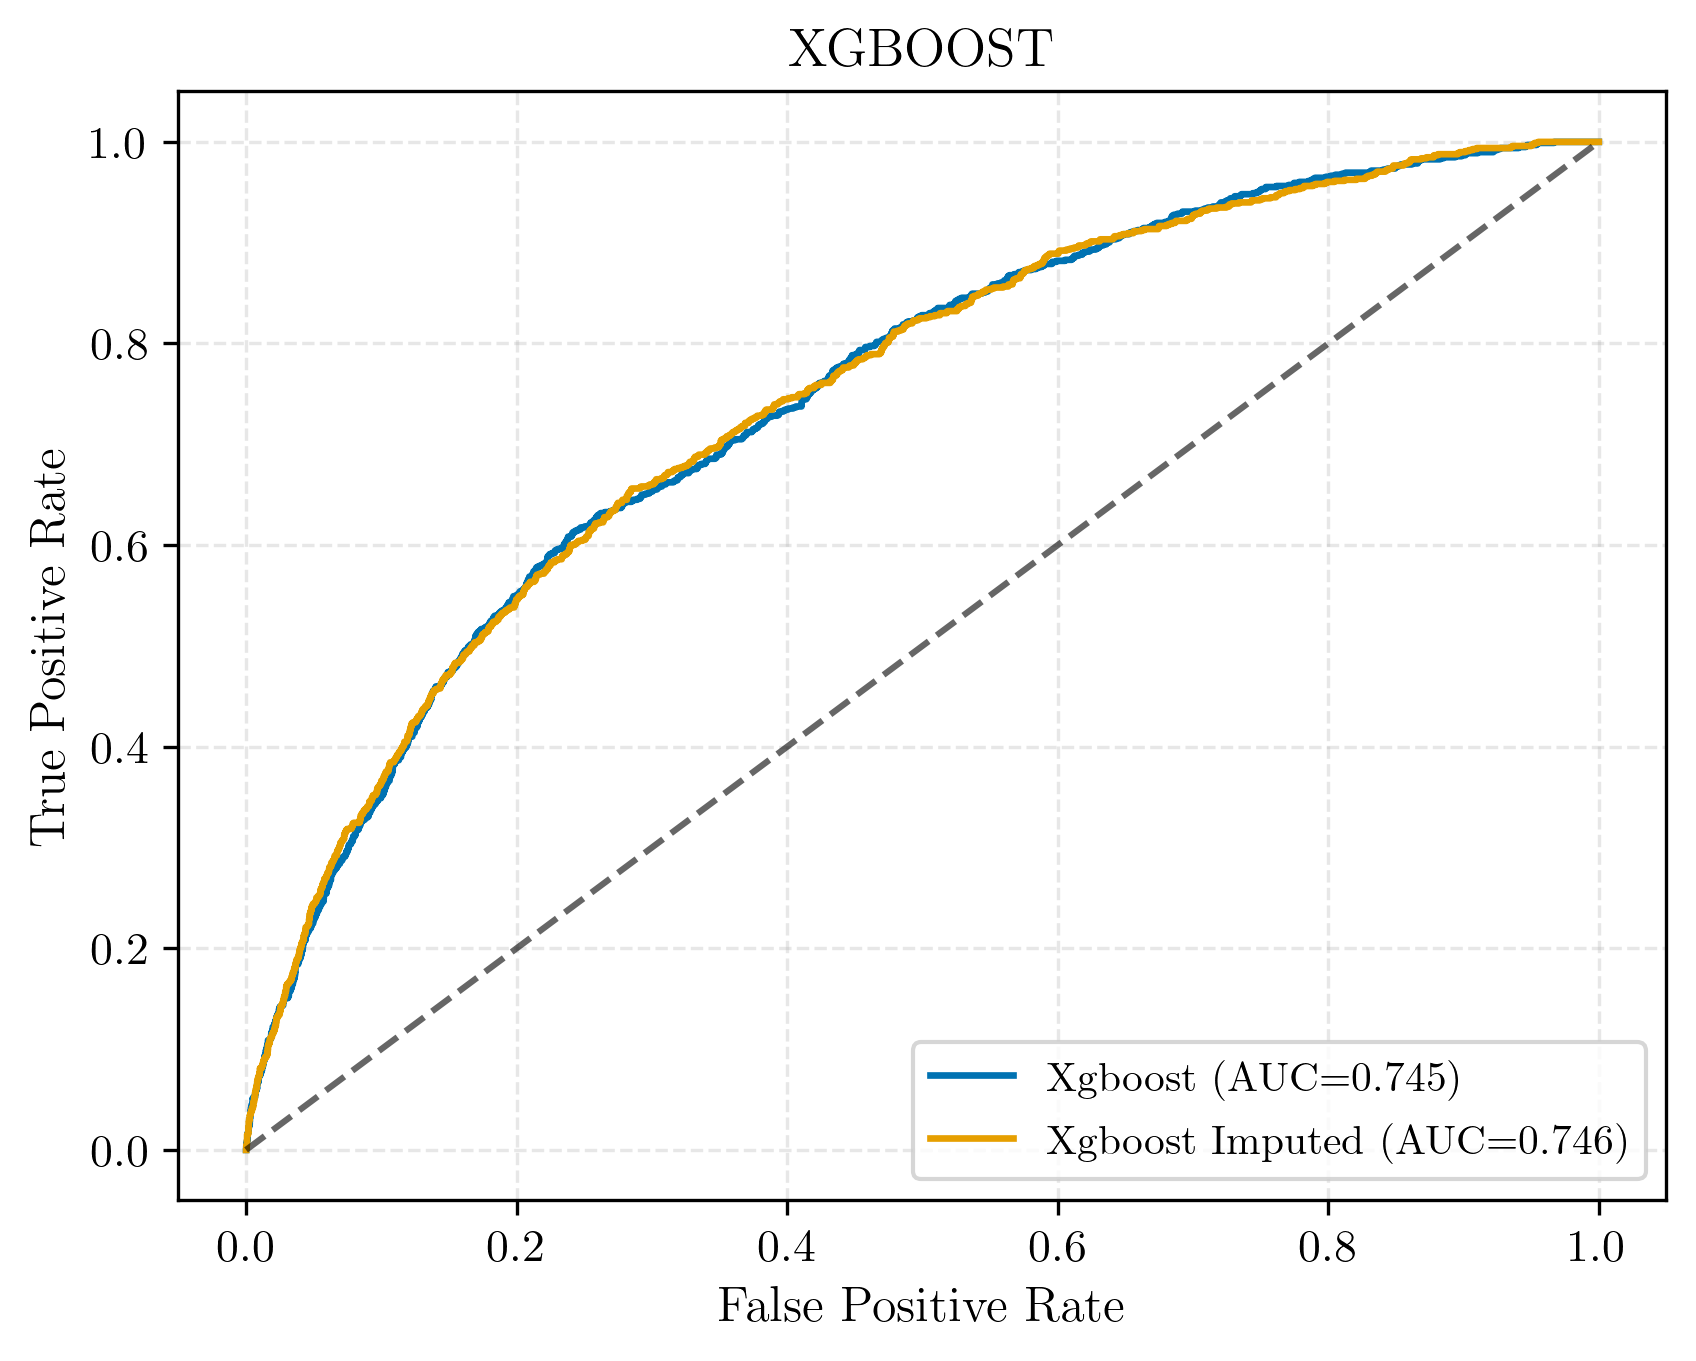

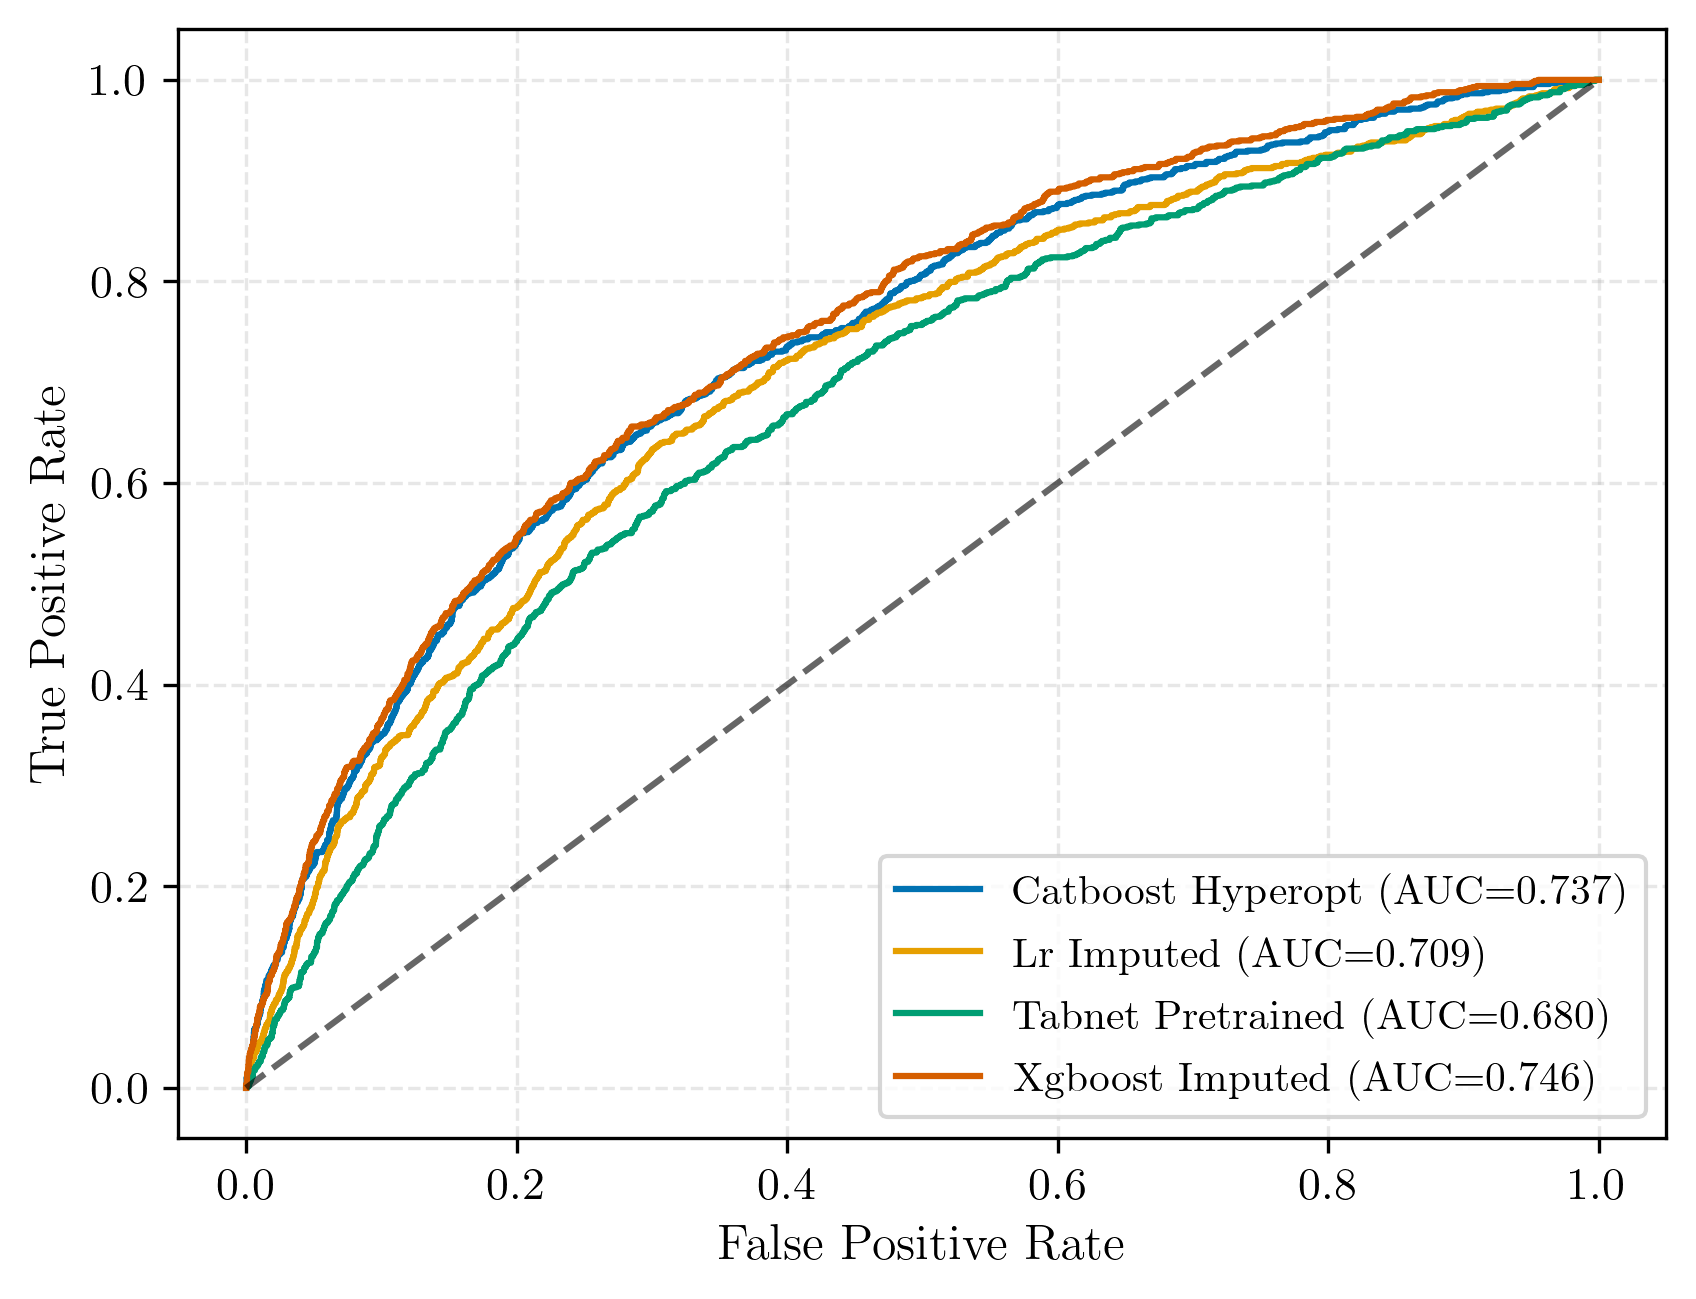

In [3]:
for prefix, models in groups.items():
    fig, ax = plt.subplots()

    for (name, fpr, tpr, auroc), color in zip(models, colors):
        label = f"{name.replace('_',' ').title()} (AUC={auroc:.3f})"
        ax.plot(fpr, tpr, linewidth=1.6, color=color, label=label)

    ax.plot([0,1], [0,1], "--", color="black", linewidth=1.5, alpha=0.6)

    ax.set_title(f"{prefix.title().upper()}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")

    filename = f"roc_{prefix}.svg"
    fig.savefig(filename, bbox_inches="tight", format="svg")
    print(f"Saved: {filename}")

best_models = {}

for prefix, models in groups.items():
    best = max(models, key=lambda x: x[3])  
    best_models[prefix] = best   

fig, ax = plt.subplots()

for (prefix, (name, fpr, tpr, auroc)), color in zip(best_models.items(), colors):
    # Use full model name in the legend
    label = f"{name.replace('_',' ').title()} (AUC={auroc:.3f})"
    ax.plot(fpr, tpr, linewidth=1.5, color=color, label=label)

ax.plot([0,1], [0,1], "--", color="black", linewidth=1.5, alpha=0.6)
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
fig.savefig("roc_best_models.svg", bbox_inches="tight", format="svg")
print("Saved: roc_best_models.svg")